<a href="https://colab.research.google.com/github/Anu-Basu/SVM/blob/main/heart_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SVM**

Used in both classification and regression. Very useful algorithm, espeacially for binary comparisons. It can be used as a linear function or a quadratic depending on the hyperplane and parameters.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
%matplotlib inline

In [ ]:
cols = ["age","sex","cp", "trestbps","chol", "fbs","restecg",
       "thalach","exang","oldpeak","slope","ca","thal","num"]
df = pd.read_csv('processed.hungarian.data', names = cols).drop(["sex","cp","fbs","exang","restecg", "num","slope", "ca", "thal"], axis=1)


for data in df:
  df[data]=pd.to_numeric(df[data], errors='coerce').astype(float)
  df[data].fillna(df[data].median(), inplace=True)
df.dropna(axis= 1, inplace=True)
df.head()
#df.describe()

,age,trestbps,chol,thalach,oldpeak
0,28.0,130.0,132.0,185.0,0.0
1,29.0,120.0,243.0,160.0,0.0
2,29.0,140.0,243.0,170.0,0.0
3,30.0,170.0,237.0,170.0,0.0
4,31.0,100.0,219.0,150.0,0.0


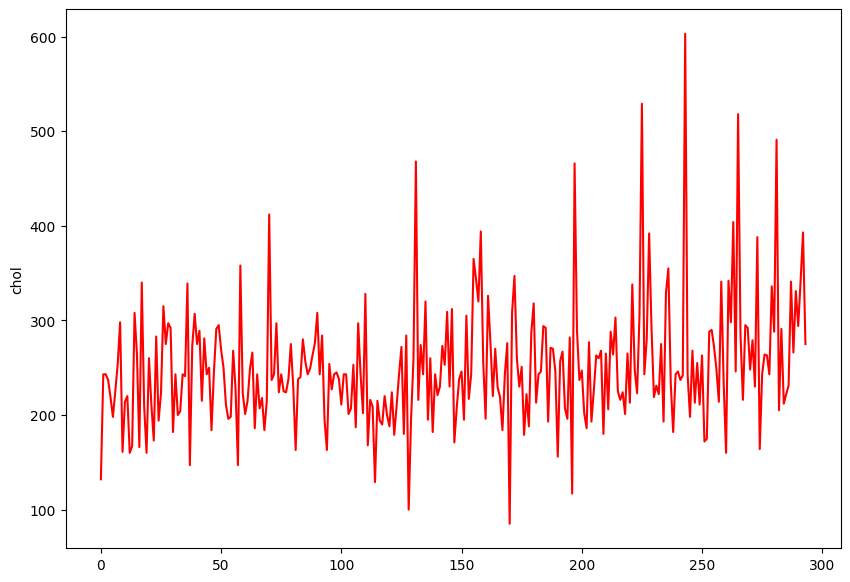

In [ ]:
df.chol.plot(figsize=(10,7), color='r')
plt.ylabel("{}".format('chol'))

plt.show()

<ipython-input-4-2614caa6fe82>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chol'])
<ipython-input-4-2614caa6fe82>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['thalach'])
<ipython-input-4-2614caa6fe82>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in s

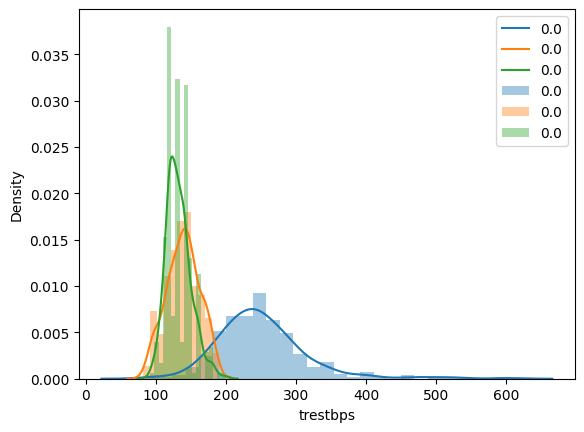

In [ ]:
sns.distplot(df['chol'])
sns.distplot(df['thalach'])
sns.distplot(df['trestbps'])
for i in df:
  plt.legend(df[i])

In [ ]:
#model

x = df.drop("chol", axis = 1)
y = df["chol"]

from sklearn.model_selection import train_test_split

x_train, y_train, x_test, y_test = train_test_split(x,y,test_size=0.33, random_state=42)

x_train = np.linspace(0, 2*np.pi, 8)
y_train = np.sin(x_train) + np.random.normal(0, 0.4, 8)
x_train = x_train.reshape(8,-1)
y_test = y_train.reshape(8,-1)

In [ ]:
#from sklearn.model_selection import GridSearchCV #used to fine tune the models

svr = SVR()

svr = SVR(C=100,gamma=0.01, kernel='rbf',)
svr.fit(x_train, y_train)

svr_pred = svr.predict(y_test)
print(y_test.reshape(1,-1))
print(svr_pred)


[[-0.22078831  0.29721939  1.07601124  0.39218505 -0.36157607 -1.73102995
  -1.19746111 -0.1228354 ]]
[-0.03136607  0.10685582  0.20992977  0.1262193  -0.07824781 -0.72108599
 -0.43308367 -0.00106248]
